In [1]:
import numpy as np
from scipy.io import loadmat, savemat
from scipy.signal import find_peaks
import os
import matplotlib.pyplot as plt
from matplotlib import interactive

cwd_path = os.getcwd()
loaded_data = loadmat('data.mat')
loaded_data_ultrasonic = loaded_data['ultrasound']
loaded_data_signal = loaded_data['sig']

In [2]:
loaded_data

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Sun Jan 26 20:43:10 2025',
 '__version__': '1.0',
 '__globals__': [],
 'ultrasound': array([[255,   0, 212, ...,  41,  65,  68]], shape=(1, 806912)),
 'sig': array([[0, 0, 0, ..., 0, 0, 0]], shape=(1, 806912))}

In [3]:
index = 0

is_255 = loaded_data_signal[index] == 255
runs = np.diff(np.where(np.concatenate(([0], is_255, [0])))[0])
starts = np.where(np.diff(np.concatenate(([0], is_255, [0])) == 1))[0]


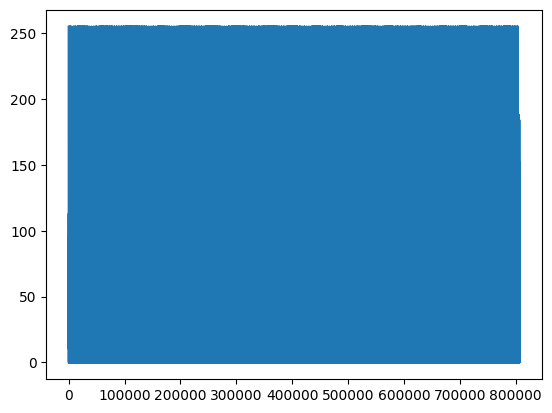

In [4]:
plt.plot(loaded_data_ultrasonic[index])

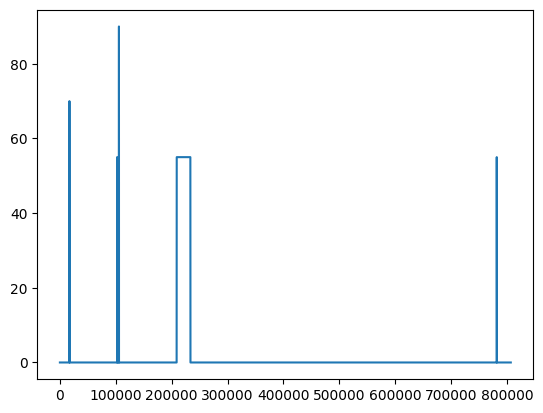

In [5]:
threshold = 0.8  # Set a threshold for peak detection
peaks, _ = find_peaks(loaded_data_signal[index], height=threshold)
noise_end_index = peaks[np.argmax(np.diff(peaks) < 20)]


cropped_signal: list = []
for num, i in enumerate(loaded_data_signal[index]):
    if i >= 200: cropped_signal.append(loaded_data_ultrasonic[index][i])
    else: cropped_signal.append(0)
plt.plot(cropped_signal)


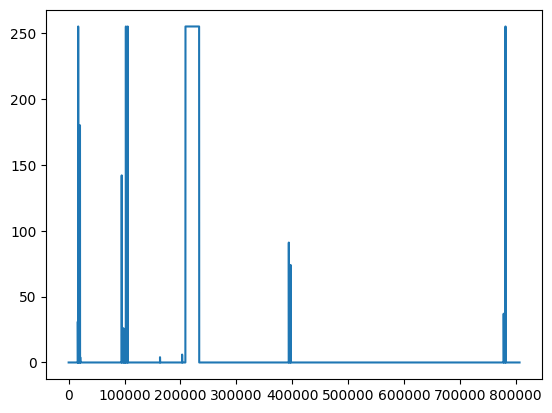

In [6]:
plt.plot(loaded_data_signal[index])

In [7]:
# Identify high periods
is_high = loaded_data_signal[index] == 255

# Find the start and end indices of high periods
high_periods = np.diff(np.where(np.concatenate(([0], is_high, [0])))[0])
high_starts = np.where(np.diff(np.concatenate(([0], is_high, [0])) == 1))[0]
high_ends = np.where(np.diff(np.concatenate(([0], is_high, [0])) == -1))[0]


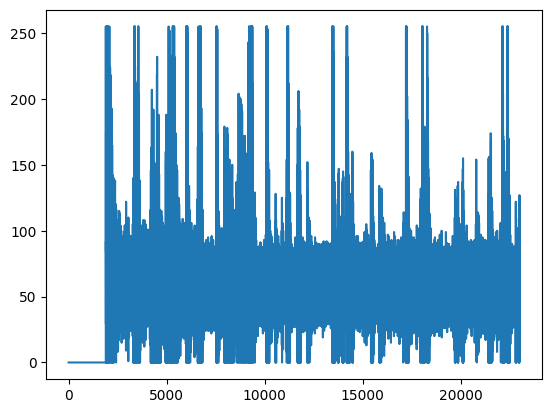

In [14]:
bruh = []
for num, i in enumerate(loaded_data_signal[index]):
    if i >= 255: 
        bruh.append(loaded_data_ultrasonic[index][num])
    else: bruh.append(0)
bruh = bruh[207000: 230000]
interactive(True)
plt.plot(bruh)


In [9]:
high_starts

array([ 17074,  17075, 102407, 102410, 102418, 102422, 102429, 102432,
       102439, 102442, 105589, 105591, 105600, 105602, 105609, 105614,
       105620, 105623, 105629, 105633, 105641, 105643, 105679, 105681,
       208896, 233472, 781780, 781781])

In [10]:

# Calculate the lengths of high periods
high_lengths = high_ends - high_starts

# Find the longest high period
longest_high_idx = np.argmax(high_lengths)
longest_high_start = high_starts[longest_high_idx]
longest_high_end = high_ends[longest_high_idx]

# Get the x coordinates for the start and end of the longest high period
longest_high_start_x = x[longest_high_start]
longest_high_end_x = x[longest_high_end]

print(f"Longest high period starts at x = {longest_high_start_x} and ends at x = {longest_high_end_x}")

ValueError: operands could not be broadcast together with shapes (0,) (28,) 

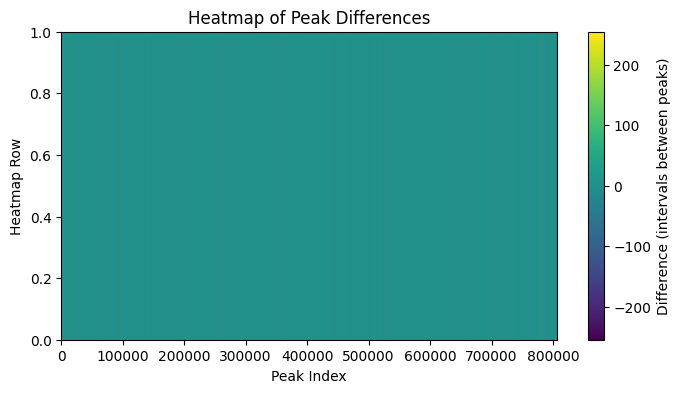

In [ ]:
peak_diffs = np.diff(loaded_data_ultrasonic[index])

plt.figure(figsize=(8, 4))

# Convert differences to a 2D array for heatmap representation
heatmap_data = np.array([peak_diffs])  # Create a single-row heatmap

plt.imshow(heatmap_data, cmap="viridis", aspect="auto", extent=[0, len(peak_diffs), 0, 1])
plt.colorbar(label="Difference (intervals between peaks)")
plt.xlabel("Peak Index")
plt.ylabel("Heatmap Row")
plt.title("Heatmap of Peak Differences")
plt.show()


In [8]:
np.diff(peaks) < 20

array([False,  True,  True, False,  True,  True, False, False, False,
       False,  True, False, False, False, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False,  True,
       False, False,  True, False, False,  True])

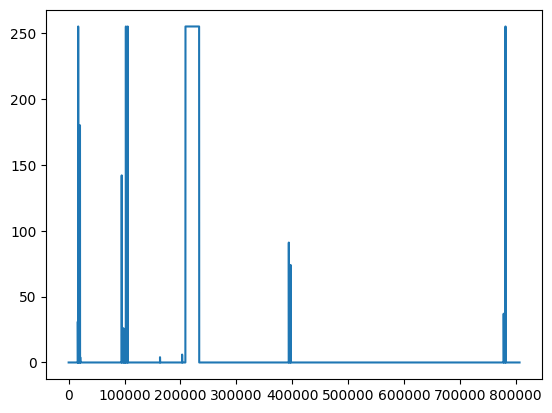

In [ ]:
plt.plot(loaded_data_signal[index])

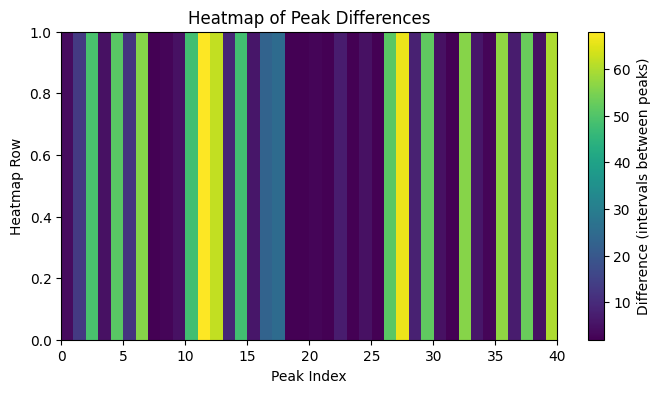

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Example data (replace this with your actual data)
x = np.linspace(0, 1000, 1000)
signal = np.sin(0.1 * x) + 0.5 * np.random.normal(size=len(x))
signal[200:210] += 2  # Add prominent peaks
signal[500:510] += 2
signal[700:710] += 2

# Detect peaks
threshold = 1.5  # Adjust based on your data
peaks, _ = find_peaks(signal, height=threshold)

# Calculate differences between peaks
peak_diffs = np.diff(peaks)

# Create a heatmap
plt.figure(figsize=(8, 4))

# Convert differences to a 2D array for heatmap representation
heatmap_data = np.array([peak_diffs])  # Create a single-row heatmap

plt.imshow(heatmap_data, cmap="viridis", aspect="auto", extent=[0, len(peak_diffs), 0, 1])
plt.colorbar(label="Difference (intervals between peaks)")
plt.xlabel("Peak Index")
plt.ylabel("Heatmap Row")
plt.title("Heatmap of Peak Differences")
plt.show()